In [1]:
!pip install unidecode

     |████████████████████████████████| 245kB 6.8MB/s 


In [2]:
import pandas as pd
import numpy as np
from unidecode import unidecode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering



In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [4]:
df_Informacao_Municipais = pd.read_excel("/content/sample_data/Case - Data Science IBOPE.XLS", sheet_name= "Informações_Municipais", skiprows= 3)

In [5]:
df_Informacao_Municipais.head(3)

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000","Intensidade da pobreza, 2000","Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000"
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246


In [6]:
#3 tratamento colunas 
df_Informacao_Municipais.columns = [col.replace(",", "") for col in df_Informacao_Municipais.columns]
df_Informacao_Municipais.columns = [col.replace(" ", "_") for col in df_Informacao_Municipais.columns]
df_Informacao_Municipais.columns = [col.replace("(", "") for col in df_Informacao_Municipais.columns]
df_Informacao_Municipais.columns = [col.replace(")", "") for col in df_Informacao_Municipais.columns]

coluna_nova = []
lista_colunas = df_Informacao_Municipais.columns.tolist()
for lista_coluna in lista_colunas:
  coluna_nova.append(unidecode(lista_coluna))
df_Informacao_Municipais.columns = coluna_nova


In [7]:
#create column estado
lista = df_Informacao_Municipais["Municipio"].tolist()
lista_estado = []
for x in lista:
  lista_estado.append(x[-3:-1])
lista_estado 
df_Informacao_Municipais["Estado"] = lista_estado

In [8]:
df_Informacao_Municipais.head(3)

,Codigo,Municipio,Area_km2,Densidade_demografica_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Populacao_urbana_2000,Populacao_rural_2000,Estado
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875,GO
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519,MG
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246,GO


In [9]:
#quantidade nan
df_Informacao_Municipais.isna().sum().sum()

0

In [10]:
df_Informacao_Municipais.duplicated(subset = ["Codigo"]).any()

False

In [11]:
## resolvendo duplicados 
codigo_duplicados = df_Informacao_Municipais.duplicated(subset=['Codigo'])
if codigo_duplicados.any():
  print(codigo_duplicados.loc[~codigo_duplicados])

In [12]:
df_Informacao_Municipais['razao_urbana_total_2000']= df_Informacao_Municipais.Populacao_urbana_2000/df_Informacao_Municipais.Populacao_total_2000
df_Informacao_Municipais['crescimento_populacao_total_1991_2000'] = (df_Informacao_Municipais.Populacao_total_2000 - df_Informacao_Municipais.Populacao_total_1991 )/df_Informacao_Municipais.Populacao_total_1991
df_Informacao_Municipais['crescimento_25_mais_1991_2000'] = (df_Informacao_Municipais.Populacao_de_25_anos_ou_mais_de_idade_2000 - df_Informacao_Municipais.Populacao_de_25_anos_ou_mais_de_idade_1991 )/df_Informacao_Municipais.Populacao_de_25_anos_ou_mais_de_idade_1991
df_Informacao_Municipais['crescimento_65_mais_1991_2000'] = (df_Informacao_Municipais.Populacao_de_65_anos_ou_mais_de_idade_2000 - df_Informacao_Municipais.Populacao_de_65_anos_ou_mais_de_idade_1991 )/df_Informacao_Municipais.Populacao_de_65_anos_ou_mais_de_idade_1991


In [13]:
## esta base df é a base com colunas padronizadas mas não será usada na etapa 1.
df= df_Informacao_Municipais.copy()

In [14]:
df.head(3)

,Codigo,Municipio,Area_km2,Densidade_demografica_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Populacao_urbana_2000,Populacao_rural_2000,Estado,razao_urbana_total_2000,crescimento_populacao_total_1991_2000,crescimento_25_mais_1991_2000,crescimento_65_mais_1991_2000
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875,GO,0.622812,0.176011,0.299679,0.876033
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519,MG,0.609215,-0.007086,0.142987,0.296610
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246,GO,0.629235,0.218039,0.395426,0.538117


In [14]:

vars_log = ['Area_km2',
       'Densidade_demografica_2000', 'Mortalidade_ate_um_ano_de_idade_2000','Taxa_de_fecundidade_total_2000',
       'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
       'Renda_per_Capita_2000',
       'Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
       'Populacao_de_25_anos_ou_mais_de_idade_1991',
       'Populacao_de_25_anos_ou_mais_de_idade_2000',
       'Populacao_de_65_anos_ou_mais_de_idade_1991',
       'Populacao_de_65_anos_ou_mais_de_idade_2000', 'Populacao_total_1991',
       'Populacao_total_2000']



In [16]:
## aplicar log nas vars 
for c in vars_log:
  df[c]= np.log(df[c])

## aplicar raiz quadrada na 
df.Distancia_a_capital_km = np.sqrt(df.Distancia_a_capital_km)

In [17]:
df.head(3)

,Codigo,Municipio,Area_km2,Densidade_demografica_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Populacao_urbana_2000,Populacao_rural_2000,Estado,razao_urbana_total_2000,crescimento_populacao_total_1991_2000,crescimento_25_mais_1991_2000,crescimento_65_mais_1991_2000
0,520005,Abadia de Goiás (GO),4.919251,3.591818,4.627560,67.58,3.321432,1.047319,2.749832,5.324326,0.53,36.89,34.40,0.742,80.17,88.03,1.583094,7.534763,7.796880,4.795791,5.424950,8.349248,8.511376,3096,1875,GO,0.622812,0.176011,0.299679,0.876033
1,310010,Abadia dos Dourados (MG),6.799502,1.974081,19.770597,72.92,3.020913,0.932164,2.672768,5.279950,0.52,51.90,35.22,0.760,74.57,86.58,1.472472,8.104099,8.237744,5.869297,6.129050,8.778326,8.771215,3927,2519,MG,0.609215,-0.007086,0.142987,0.296610
2,520010,Abadiânia (GO),6.954353,2.388763,8.868001,69.59,3.107274,1.018847,3.082369,5.125808,0.56,47.06,40.32,0.723,74.18,82.45,1.444563,8.352554,8.685754,6.100319,6.530878,9.148678,9.345920,7206,4246,GO,0.629235,0.218039,0.395426,0.538117


In [18]:
vars_log.extend(['Distancia_a_capital_km' , 'Esperanca_de_vida_ao_nascer_2000', 'Indice_de_Gini_2000',
       'Intensidade_da_indigencia_2000', 'Intensidade_da_pobreza_2000',
       'Indice_de_Desenvolvimento_Humano_Municipal_2000',
       'Taxa_bruta_de_frequencia_a_escola_2000', 'Taxa_de_alfabetizacao_2000'])
vars_log

['Area_km2',
 'Densidade_demografica_2000',
 'Mortalidade_ate_um_ano_de_idade_2000',
 'Taxa_de_fecundidade_total_2000',
 'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
 'Renda_per_Capita_2000',
 'Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
 'Populacao_de_25_anos_ou_mais_de_idade_1991',
 'Populacao_de_25_anos_ou_mais_de_idade_2000',
 'Populacao_de_65_anos_ou_mais_de_idade_1991',
 'Populacao_de_65_anos_ou_mais_de_idade_2000',
 'Populacao_total_1991',
 'Populacao_total_2000',
 'Distancia_a_capital_km',
 'Esperanca_de_vida_ao_nascer_2000',
 'Indice_de_Gini_2000',
 'Intensidade_da_indigencia_2000',
 'Intensidade_da_pobreza_2000',
 'Indice_de_Desenvolvimento_Humano_Municipal_2000',
 'Taxa_bruta_de_frequencia_a_escola_2000',
 'Taxa_de_alfabetizacao_2000']

In [19]:
## padronizar x- mean(x) / sd(x ), podiamos usar standardscale do sklearn
for c in vars_log:
  df[c]= (df[c] - np.mean(df[c]) )/ np.std(df[c])


In [20]:
df.head()

,Codigo,Municipio,Area_km2,Densidade_demografica_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Populacao_urbana_2000,Populacao_rural_2000,Estado,razao_urbana_total_2000,crescimento_populacao_total_1991_2000,crescimento_25_mais_1991_2000,crescimento_65_mais_1991_2000
0,520005,Abadia de Goiás (GO),-1.006100,0.316172,-1.956877,-0.034755,-0.094277,0.102636,-0.531210,0.594140,-0.523949,-1.220016,-1.182129,0.511050,0.328420,0.786522,0.707499,-0.828806,-0.754059,-1.344760,-1.068735,-0.856766,-0.759695,3096,1875,GO,0.622812,0.176011,0.299679,0.876033
1,310010,Abadia dos Dourados (MG),0.462013,-0.833149,0.899115,1.063903,-0.622016,-0.385885,-0.649753,0.517508,-0.694430,0.199970,-1.105719,0.726676,-0.506370,0.670142,0.384287,-0.298316,-0.354126,-0.355004,-0.413149,-0.456129,-0.525809,3927,2519,MG,0.609215,-0.007086,0.142987,0.296610
2,520010,Abadiânia (GO),0.582922,-0.538538,-1.157126,0.378785,-0.470358,-0.018149,-0.019681,0.251326,-0.012507,-0.257907,-0.630484,0.283445,-0.564507,0.338657,0.302744,-0.066812,0.052290,-0.142005,-0.039008,-0.110326,-0.008507,7206,4246,GO,0.629235,0.218039,0.395426,0.538117
3,150010,Abaetetuba (PA),0.920274,0.820266,-1.480324,0.621560,-0.232041,0.527219,0.181046,-0.611176,0.498936,-0.489683,0.368441,0.079798,0.565441,0.201409,0.330179,1.860421,1.890532,1.831346,1.750454,2.097103,2.099782,70843,48309,PA,0.594560,0.191651,0.338052,0.236287
4,310020,Abaeté (MG),1.015143,-0.452690,-0.353921,0.977492,-0.531898,-0.608764,-0.539098,0.959798,0.328455,-0.781060,-1.435588,0.942302,0.063076,0.747996,0.652998,0.747512,0.723753,0.676804,0.746607,0.626075,0.593770,19022,3338,MG,0.850716,0.080768,0.220703,0.471402


In [21]:
vars_log.extend(['razao_urbana_total_2000','crescimento_populacao_total_1991_2000',
                 'crescimento_25_mais_1991_2000','crescimento_65_mais_1991_2000'])
vars_log

['Area_km2',
 'Densidade_demografica_2000',
 'Mortalidade_ate_um_ano_de_idade_2000',
 'Taxa_de_fecundidade_total_2000',
 'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
 'Renda_per_Capita_2000',
 'Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
 'Populacao_de_25_anos_ou_mais_de_idade_1991',
 'Populacao_de_25_anos_ou_mais_de_idade_2000',
 'Populacao_de_65_anos_ou_mais_de_idade_1991',
 'Populacao_de_65_anos_ou_mais_de_idade_2000',
 'Populacao_total_1991',
 'Populacao_total_2000',
 'Distancia_a_capital_km',
 'Esperanca_de_vida_ao_nascer_2000',
 'Indice_de_Gini_2000',
 'Intensidade_da_indigencia_2000',
 'Intensidade_da_pobreza_2000',
 'Indice_de_Desenvolvimento_Humano_Municipal_2000',
 'Taxa_bruta_de_frequencia_a_escola_2000',
 'Taxa_de_alfabetizacao_2000',
 'razao_urbana_total_2000',
 'crescimento_populacao_total_1991_2000',
 'crescimento_25_mais_1991_2000',
 'crescimento_65_mais_1991_2000']

In [23]:
## kmeans etapa 1, nao vamos usar padronização nem normalização nesta etapa, por
## isso estamos usando diretamente df_Informacao_Municipais
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_Informacao_Municipais[vars_log])
    distortions.append(km.inertia_)



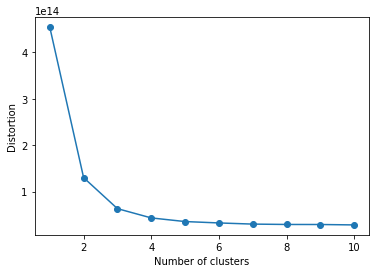

In [25]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [26]:
## usaremos k=3
kmeans_3 = km = KMeans(
        n_clusters=3, init='random',
        n_init=3, max_iter=300,
        tol=1e-04, random_state=0
    )
kmeans_3.fit(df_Informacao_Municipais[vars_log])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=3, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [27]:
df_Informacao_Municipais['grupo']=np.ndarray.tolist(kmeans_3.labels_)
df_Informacao_Municipais.grupo.value_counts()

1    5482
0      23
2       2
Name: grupo, dtype: int64

In [28]:
## vamos caracterizar cada municipio e olhar as médias de cada variavel 


pd.DataFrame({
"grupo_1":df_Informacao_Municipais[df_Informacao_Municipais.grupo==0][vars_log].mean(axis=0),
 "grupo_2":df_Informacao_Municipais[df_Informacao_Municipais.grupo==1][vars_log].mean(axis=0),
 "grupo_3":df_Informacao_Municipais[df_Informacao_Municipais.grupo==2][vars_log].mean(axis=0)}).round(2)
# "grupo_4":df_Informacao_Municipais[df_Informacao_Municipais.grupo==3][vars_log].mean(axis=0)})

##fim da etapa 1 

,grupo_1,grupo_2,grupo_3
Area_km2,1562.89,1549.21,1396.35
Densidade_demografica_2000,2919.67,82.84,5718.00
Mortalidade_ate_um_ano_de_idade_2000,25.29,34.12,21.78
Taxa_de_fecundidade_total_2000,1.99,2.87,1.88
Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,8.44,26.75,5.24
Renda_per_Capita_2000,401.66,169.69,603.34
Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,7.39,4.02,8.12
Populacao_de_25_anos_ou_mais_de_idade_1991,472287.61,8776.09,4140949.50
Populacao_de_25_anos_ou_mais_de_idade_2000,618603.00,11289.03,4668695.50
Populacao_de_65_anos_ou_mais_de_idade_1991,40529.52,957.85,451533.50


In [ ]:
df_Informacao_Municipais.loc[((df_Informacao_Municipais.grupo==0) | (df_Informacao_Municipais.grupo==2))].to_csv('capitais_1.csv')


In [30]:
## vamos usar principal component para visualizar os grupos da etapa 1

pca= PCA(n_components=2)
pca.fit(df_Informacao_Municipais[vars_log])
print(pca.explained_variance_ratio_)
df_pca= pca.fit_transform(df_Informacao_Municipais[vars_log])

[0.99765869 0.00166719]


In [32]:
df_plot= pd.DataFrame( {
    'pca_1':df_pca[:,0].tolist(), 
                        'pca_2':df_pca[:,1].tolist(),
                        "grupos":df_Informacao_Municipais.grupo })
df_plot.grupos.value_counts()

1    5482
0      23
2       2
Name: grupos, dtype: int64

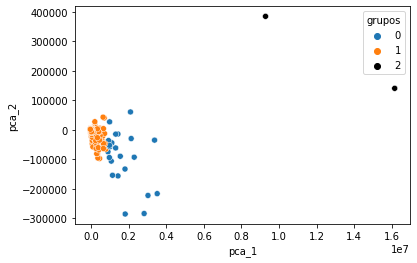

In [33]:
## visualizando
sns.scatterplot(x="pca_1",y ="pca_2",hue="grupos",data=df_plot,palette=["C0", "C1", "k"])


In [34]:
# inicio da etapa 2 onde pegaremos apenas os elementos do grupo 2 e segmentaremos mais ainda
##pegar apenas grupo 2 para segmentar novamente

df_grupo_2= df_Informacao_Municipais[df_Informacao_Municipais.grupo==1].copy()
df_grupo_2.shape

(5482, 31)

In [35]:
#kmeans sem padronizar na etapa 2
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_grupo_2[vars_log])
    distortions.append(km.inertia_)




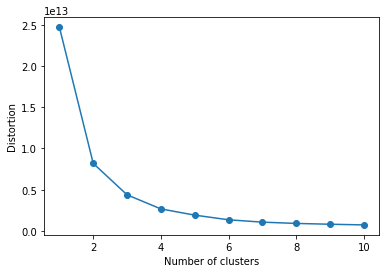

In [36]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [37]:
## selecionando k =3 
kmeans_3 = km = KMeans(
        n_clusters=3, init='random',
        n_init=3, max_iter=300,
        tol=1e-04, random_state=0
    )
kmeans_3.fit(df_grupo_2[vars_log])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=3, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [38]:
df_grupo_2['grupo']=np.ndarray.tolist(kmeans_3.labels_)
df_grupo_2.grupo.value_counts()

0    5025
2     385
1      72
Name: grupo, dtype: int64

In [33]:
df_grupo_2.loc[(df_grupo_2.grupo!=1)].to_csv('capitais_3.csv')

In [39]:
## caracterizando os grupos da etapa 2 
pd.DataFrame({
"grupo_1":df_grupo_2[df_grupo_2.grupo==0][vars_log].mean(axis=0),
 "grupo_2":df_grupo_2[df_grupo_2.grupo==1][vars_log].mean(axis=0),
 "grupo_3":df_grupo_2[df_grupo_2.grupo==2][vars_log].mean(axis=0)}).round(2)
 #"grupo_4":df_grupo_2[df_grupo_2.grupo==3][vars_log].mean(axis=0)}).round(2)

,grupo_1,grupo_2,grupo_3
Area_km2,1460.27,1976.09,2630.25
Densidade_demografica_2000,36.97,1543.40,408.41
Mortalidade_ate_um_ano_de_idade_2000,34.82,22.82,27.11
Taxa_de_fecundidade_total_2000,2.91,2.16,2.53
Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,27.75,9.73,16.89
Renda_per_Capita_2000,160.77,344.39,253.37
Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,3.87,6.72,5.49
Populacao_de_25_anos_ou_mais_de_idade_1991,4952.72,132037.78,35626.95
Populacao_de_25_anos_ou_mais_de_idade_2000,6109.67,175748.18,48133.70
Populacao_de_65_anos_ou_mais_de_idade_1991,600.67,11910.57,3571.37


In [42]:
## vamos usar principal component para visualizar os grupos da etapa 2

pca= PCA(n_components=2)
pca.fit(df_grupo_2[vars_log])
print(pca.explained_variance_ratio_)
df_pca= pca.fit_transform(df_grupo_2[vars_log])

[0.98583305 0.00746901]


In [44]:
df_plot_2= pd.DataFrame( {
    'pca_1':df_pca[:,0].tolist(), 
                        'pca_2':df_pca[:,1].tolist(),
                        "grupos":df_grupo_2.grupo })
df_plot_2.grupos.value_counts()

0    5025
2     385
1      72
Name: grupos, dtype: int64

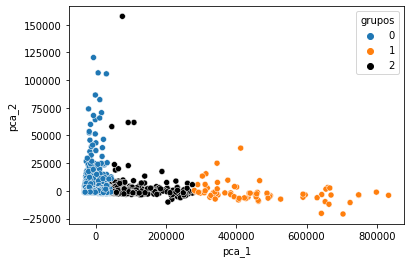

In [46]:
## visualizando
sns.scatterplot(x="pca_1",y ="pca_2",hue="grupos",data=df_plot_2,palette=["C0", "C1", "k"])


In [ ]:
# fim da etapa 2